`A random forest is a collection of decision trees that work together to make predictions. 

It takes different random parts if dataset to train each tree and then it combines the results by averaging them(for regression) or majority vote (for classification). This approch helps improve the accuracy of predictions. Random forest is a type of Ensemble learning.

The randomness in data samples and feature selection helps to prevent the model from overfitting making the predictions more accurate and reliable


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline
import seaborn as sn


In [7]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

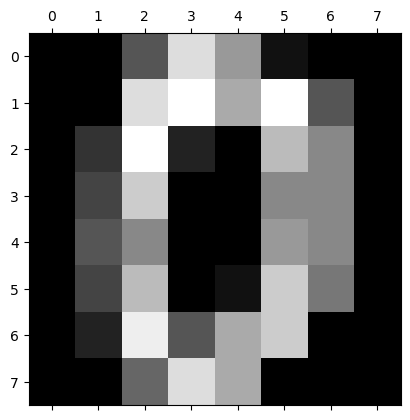

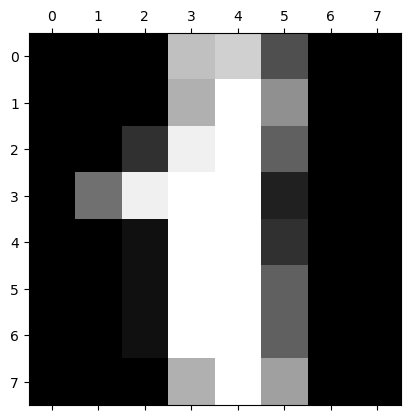

In [10]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])

In [52]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
df = pd.DataFrame(digits.data,digits.target)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
X = df.drop(['target'], axis='columns')
y = df.target

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

y_pred= model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.975

Text(95.72222222222221, 0.5, 'Truth')

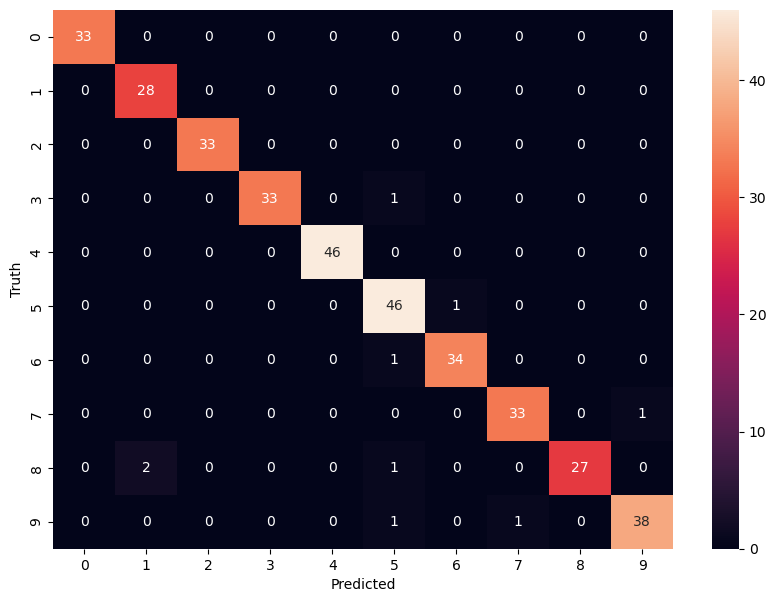

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
model_tuned = RandomForestClassifier(n_estimators=50)
model_tuned.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [37]:
y_pred_tuned = model_tuned.predict(X_test)


0.975

In [45]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test,y_pred_tuned)
cp = classification_report(y_test,y_pred_tuned)

print(f"Accuracy : {accuracy :.2f}")
print("\nClassification Report: \n", cp)

Accuracy : 0.97

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



Implementing Random Forest for Regression Task

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
california_housing = fetch_california_housing()
dir(california_housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [50]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [53]:
df = pd.DataFrame(california_housing.data, columns= california_housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [55]:
california_housing.target_names

['MedHouseVal']

In [57]:
df['MedV'] = california_housing.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MedV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [58]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [59]:
X= df.drop(['MedV'], axis='columns')
y= df['MedV']

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model_rfr = RandomForestRegressor(n_estimators=50, random_state=42)

In [63]:
model_rfr.fit(X_train,y_train)
y_pred_rf = model_rfr.predict(X_test)

In [64]:
mse = mean_squared_error(y_test,y_pred_rf)
r2 = r2_score(y_test,y_pred_rf)

In [65]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.2572979293772426
R-squared Score: 0.8036506665860602


In [68]:
# Sample Prediction
single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = model_rfr.predict(single_data)

print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")


Predicted Value: 0.53
Actual Value: 0.48


C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
